In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset

df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", "Data")

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
remove = ['ID', 'ZIP Code'] 

df = df.drop(remove, axis=1)

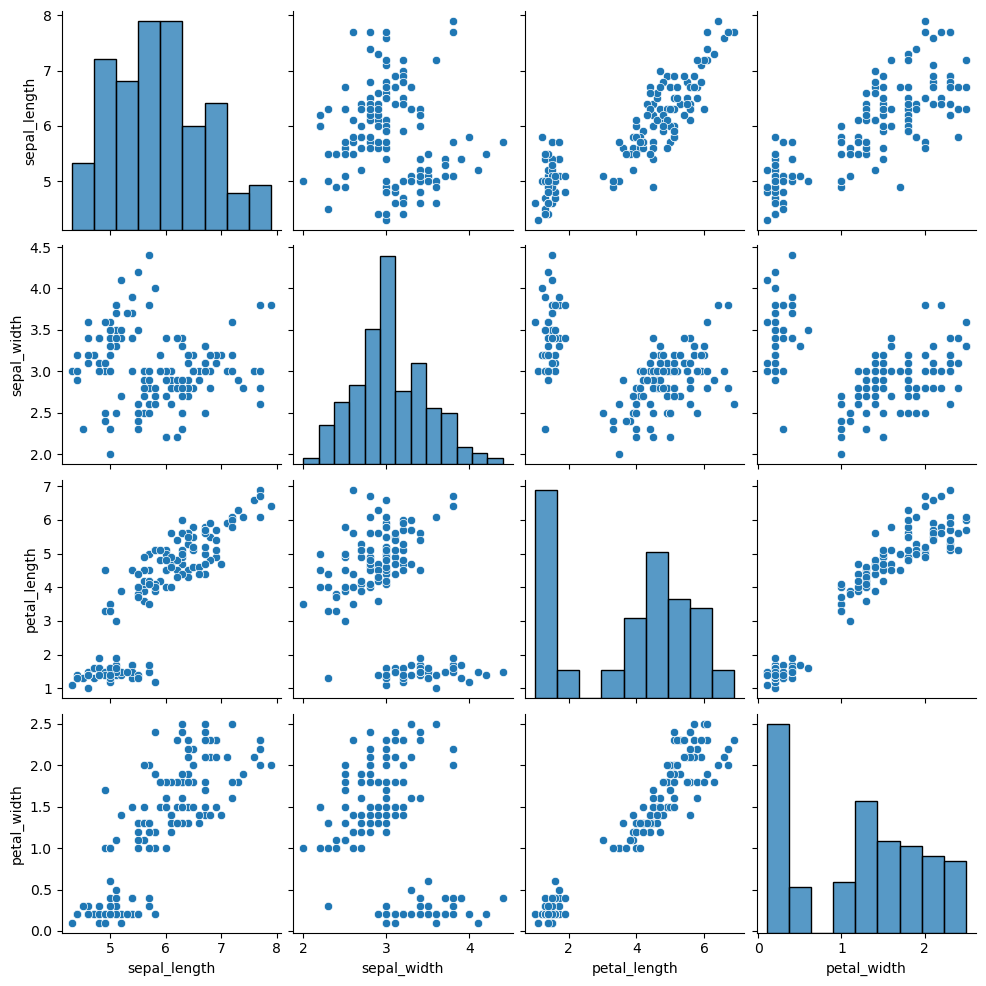

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn.axisgrid")

import seaborn as sns
import matplotlib.pyplot as plt

# Example plotting code
data = sns.load_dataset("iris")
sns.pairplot(data)
plt.show()


In [5]:
df.shape

(5000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


**Data cleaning, EDA and Feature Engineering**

In [8]:
print('skew:', df['CCAvg'].skew())

skew: 1.598456618052042


In [10]:
print('skew:', df['Income'].skew())

skew: 0.8413386072610816


In [11]:
log_cols = df[['CCAvg', 'Income']]

for c in log_cols:
    df[c] = np.log1p(df[c])

In [12]:
print('skew:', df['CCAvg'].skew())

skew: 0.31925236865480283


As shown above, the distribution for average credit card spending is closer to a normal distribution which is confirmed by a significant reduction in skew.

In [13]:
print('skew:', df['Income'].skew())

skew: -0.42071189305490625


In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_s = ss.fit_transform(df)

The optimal number of clusters can be identified using the elbow method as shown below:

Text(0, 0.5, 'Inertia')

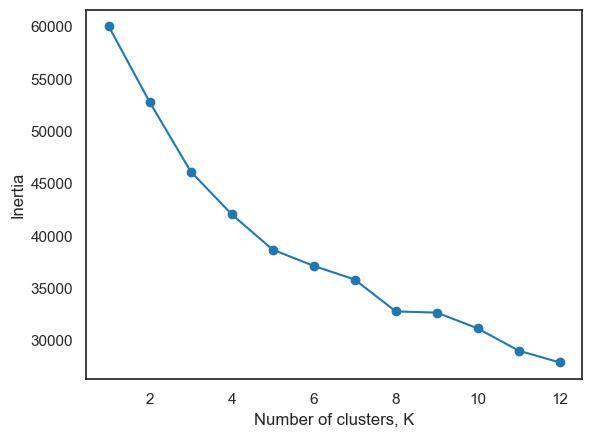

In [18]:
from sklearn.cluster import KMeans

list_n_clusters = list(range(1,13))
inertia = []

for k in list_n_clusters:
    km = KMeans(n_clusters=k)
    km.fit(df_s)
    inertia.append(km.inertia_)
    
plt.plot(list_n_clusters, inertia)
plt.scatter(list_n_clusters, inertia)
plt.xlabel('Number of clusters, K')
plt.ylabel('Inertia')

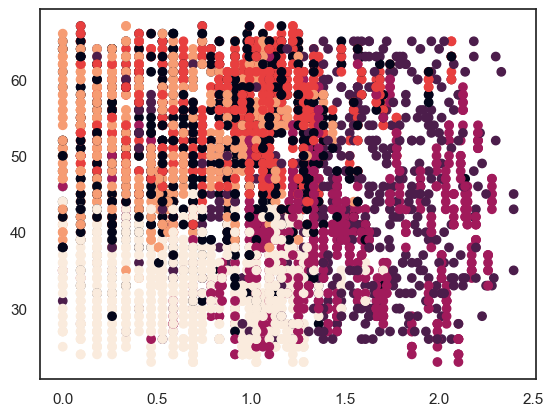

In [19]:
km = KMeans(n_clusters=6)

km_model = km.fit(df_s)
labels = km_model.fit_predict(df_s)

plt.scatter(df['CCAvg'], df['Age'], c=labels)

In [20]:
km_model.labels_

array([5, 3, 4, ..., 4, 3, 5], dtype=int32)

In [21]:
df['KMeans_label'] = km_model.labels_
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,KMeans_label
0,25,1,3.912023,4,0.955511,1,0,0,1,0,0,0,5
1,45,19,3.555348,3,0.916291,1,0,0,1,0,0,0,3
2,39,15,2.484907,1,0.693147,1,0,0,0,0,0,0,4
3,35,9,4.615121,1,1.308333,2,0,0,0,0,0,0,2
4,35,8,3.828641,4,0.693147,2,0,0,0,0,0,1,5


In [22]:
df.groupby('KMeans_label').mean()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
KMeans_label,,,,,,,,,,,,
0,51.630966,26.360885,3.904521,2.400466,0.778845,1.938300,46.493597,0.0,0.125728,0.158324,0.627474,0.996508
1,45.066667,19.843750,4.956066,2.612500,1.478677,2.233333,100.845833,1.0,0.125000,0.291667,0.606250,0.297917
2,39.623134,14.783582,4.700206,1.495025,1.431361,1.170398,92.752488,0.0,0.073383,0.016169,0.585821,0.232587
3,55.647337,30.364497,4.104885,3.098225,0.945639,1.688757,43.668639,0.0,0.139645,0.003550,0.611834,0.000000
4,52.260979,26.917189,3.600274,1.567127,0.558158,2.319950,42.218319,0.0,0.070263,0.002509,0.584693,0.001255
5,33.068313,7.701235,3.855847,2.960494,0.718685,2.017284,40.353086,0.0,0.099588,0.006584,0.576132,0.232922


In [23]:
df['KMeans_label'].value_counts()

KMeans_label
5    1215
0     859
3     845
2     804
4     797
1     480
Name: count, dtype: int64

In [24]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=6, linkage='ward', compute_full_tree=True)
model_ac = ac.fit(df_s)
df['AC_label'] = model_ac.fit_predict(df_s)

In [25]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,KMeans_label,AC_label
0,25,1,3.912023,4,0.955511,1,0,0,1,0,0,0,5,3
1,45,19,3.555348,3,0.916291,1,0,0,1,0,0,0,3,3
2,39,15,2.484907,1,0.693147,1,0,0,0,0,0,0,4,1
3,35,9,4.615121,1,1.308333,2,0,0,0,0,0,0,2,0
4,35,8,3.828641,4,0.693147,2,0,0,0,0,0,1,5,2


In [26]:
df.groupby('AC_label').mean()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,KMeans_label
AC_label,,,,,,,,,,,,,
0,39.325243,14.160194,4.192599,2.228155,0.992727,1.686624,34.135383,0.000000,0.000000,0.0,0.605717,0.091694,3.565804
1,54.405622,29.128514,3.877130,2.390361,0.780353,2.000803,84.838554,0.000000,0.000000,0.0,0.565462,0.057831,3.281124
2,45.377380,20.068309,3.849198,2.599104,0.729643,1.969765,41.589026,0.000000,0.000000,0.0,0.582307,1.000000,1.550952
3,45.180328,19.874317,4.008158,2.519126,0.890159,1.844262,47.117486,0.000000,1.000000,0.0,0.516393,0.122951,3.393443
4,45.701987,20.572848,4.465894,2.460265,1.183125,1.927152,92.324503,0.463576,0.486755,1.0,0.937086,0.794702,0.738411
5,44.670588,19.402941,4.945988,2.614706,1.470575,2.267647,92.108824,1.000000,0.026471,0.0,0.485294,0.147059,1.000000


The table above shows the mean values for each feature according to each of the 6 different clusters. We can see less defined clustering in features such as age where there is a lot of overlapping between the different groups as shown in the boxplot below.

The HAC model produced the following value counts for each cluster:

In [27]:
df['AC_label'].value_counts()

AC_label
0    1854
1    1245
2     893
3     366
5     340
4     302
Name: count, dtype: int64

Similar to K Means, HAC clustering produce 2 dominant clusters comprising 62% in total of the dataset. The smallest 3 clusters similar proportions of customers of between 300 to 400 customer profiles.

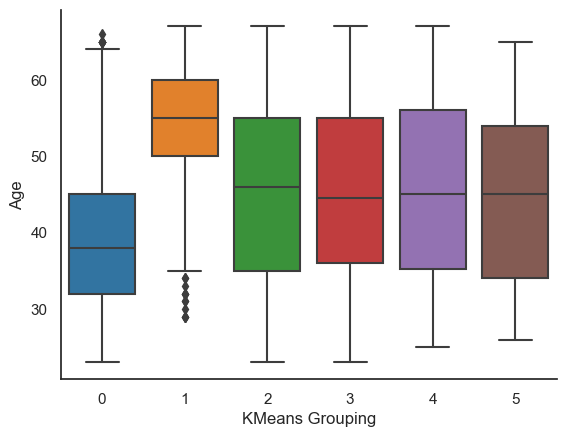

In [28]:
sns.set_style('white')
ax = sns.boxplot(x='AC_label', y='Age', data=df)
ax.set(xlabel= 'KMeans Grouping')
sns.despine()

In [29]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=3, min_samples=5)

model_dbs = dbs.fit(df_s)
df['DBS_label'] = model_dbs.fit_predict(df_s)

In [30]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,KMeans_label,AC_label,DBS_label
0,25,1,3.912023,4,0.955511,1,0,0,1,0,0,0,5,3,0
1,45,19,3.555348,3,0.916291,1,0,0,1,0,0,0,3,3,0
2,39,15,2.484907,1,0.693147,1,0,0,0,0,0,0,4,1,1
3,35,9,4.615121,1,1.308333,2,0,0,0,0,0,0,2,0,1
4,35,8,3.828641,4,0.693147,2,0,0,0,0,0,1,5,2,1


In [31]:
df['DBS_label'].value_counts()

DBS_label
 1    3992
 0     366
 2     331
 5      96
 3      89
 6      66
 4      47
 7       9
-1       4
Name: count, dtype: int64

In [32]:
df.groupby('DBS_label').mean()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,KMeans_label,AC_label
DBS_label,,,,,,,,,,,,,,
-1,47.750000,22.500000,4.866051,2.750000,1.465641,2.000000,411.500000,1.0,1.0,1.0,0.500000,0.750000,1.000000,4.000000
0,45.180328,19.874317,4.008158,2.519126,0.890159,1.844262,47.117486,0.0,1.0,0.0,0.516393,0.122951,3.393443,3.000000
1,45.382265,20.150050,4.017394,2.361723,0.867642,1.847946,51.615731,0.0,0.0,0.0,0.587926,0.284319,3.026303,0.759269
2,44.815710,19.540785,4.946740,2.631420,1.469464,2.256798,93.685801,1.0,0.0,0.0,0.498489,0.151057,1.000000,5.000000
3,46.179775,21.078652,5.012690,2.752809,1.487120,2.202247,132.292135,1.0,0.0,1.0,0.955056,0.853933,1.000000,4.000000
4,45.595745,20.468085,4.929408,2.319149,1.522408,2.063830,78.063830,1.0,1.0,1.0,0.829787,0.297872,1.000000,4.000000
5,46.197917,21.020833,3.974479,2.354167,0.856447,1.708333,60.250000,0.0,1.0,1.0,0.947917,0.843750,0.614583,4.000000
6,44.287879,19.196970,4.089002,2.303030,0.989628,1.772727,75.893939,0.0,0.0,1.0,1.000000,1.000000,0.363636,4.000000
7,39.333333,14.333333,4.918302,2.000000,1.511435,2.666667,34.111111,1.0,1.0,0.0,0.000000,0.000000,1.000000,5.000000
